In [333]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [121]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [122]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [123]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [124]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [125]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [126]:
predictions[0:5]

array([ 99.86759395,  68.56692245, 236.24272709, 107.94525894,
       240.93000402])

Text(0, 0.5, 'Predictions')

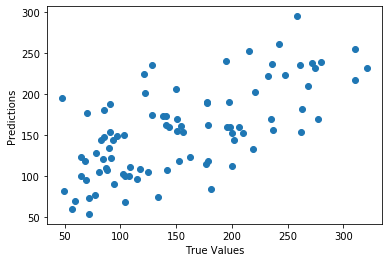

In [127]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [129]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.711738880926056
Train RMSE: 53.66529222901132


# Cross Validation

In [137]:
from sklearn.model_selection import KFold # import KFold
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y1 = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator

2

In [138]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [139]:
for train_index, test_index in kf.split(X1):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [140]:
from sklearn.model_selection import LeaveOneOut 
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y1 = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X1)


for train_index, test_index in loo.split(X1):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [141]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [142]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


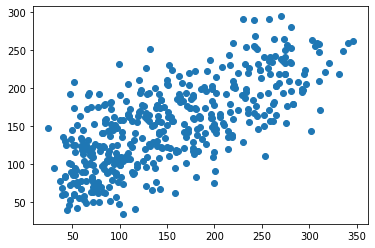

In [143]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [144]:
predictions

array([204.74116867,  66.83256782, 175.60492163, 165.82131555,
       128.83457511, 103.05913006,  77.50532134, 125.41897877,
       161.76534891, 209.5903942 ,  98.5866784 , 102.25391983,
       114.3072534 , 161.82165714, 100.50073703, 176.55193264,
       206.59118368, 184.3577636 , 147.82727722, 121.98438237,
       119.6409081 ,  89.72660898, 117.35311756, 251.99153125,
       164.01794205, 146.8714022 ,  95.41577967, 178.88367056,
       127.20395689, 179.54810126, 159.81822573,  67.84440925,
       259.65876453, 105.56967912,  78.43441365,  83.11721913,
       203.10947232, 154.06508322, 240.73979433, 137.18048859,
       158.32510156,  72.81647497, 145.48464826,  78.96090116,
       218.96414895, 125.73533137, 141.31322446, 107.95054173,
        72.54328656, 192.8483576 , 157.23952998, 171.00497069,
       134.05940748, 158.09263799, 139.09864269,  71.7115061 ,
       208.28948411,  77.67427519, 102.08430196, 135.69822265,
       113.420112  , 184.40319269,  61.37326553,  96.75

In [145]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [157]:
# your code here
kf_db = KFold(n_splits=10, shuffle=False)
kf_db.get_n_splits(df)

10

In [242]:
RMSE_test=[]
RMSE_train=[]
preds_train=[]
preds_test=[]
for tr_index, ts_index in kf_db.split(df):
    print('TRAIN:', tr_index, "\n",'TEST:', ts_index)

TRAIN: [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289

In [243]:
for tr_index, ts_index in kf_db.split(df):
    df_train, df_test = df.iloc[tr_index], df.iloc[ts_index]
    y_train, y_test = y[tr_index], y[ts_index]   
    lm = linear_model.LinearRegression()
    model=lm.fit(df_train, y_train)
    preds_train=lm.predict(df_train)
    preds_test=lm.predict(df_test)
    RMSE_test.append(float(np.sqrt(mean_squared_error(preds_test, y_test))))
    RMSE_train.append(float(np.sqrt(mean_squared_error(preds_train, y_train))))
print ('Test RMSE:', RMSE_test)
print ('Train RMSE:', RMSE_train)


Test RMSE: [50.33734309001733, 53.57954564391662, 59.26823355982129, 52.52834596063678, 59.62950564185627, 53.85517999336664, 60.79705484505578, 47.77321004446417, 64.21012366749522, 42.067612917393504]
Train RMSE: [53.89527069089265, 53.50831169877194, 52.93767121143386, 53.660850374950755, 52.7991797919298, 53.52386529541126, 52.77610006567994, 54.12936065443919, 52.18124223334303, 54.63606282271214]


In [276]:
print("Mean train RMSE:", sum(RMSE_train)/len(RMSE_train))
print("Mean test RMSE:", sum(RMSE_test)/len(RMSE_test))

Mean train RMSE: 53.404791483956465
Mean test RMSE: 54.40461553640235


In [226]:
preds_test

array([167.64584941, 187.43127434, 186.36426486,  90.74696376,
       152.50793048, 249.88521841, 198.1690098 , 280.34291449,
        50.21423222, 176.61551852, 201.67335023, 172.27167772,
       154.23159921, 151.72078601, 234.78914173, 123.09705626,
       165.11479064, 174.67055704, 226.70588198, 152.30898089,
       100.76980101,  84.49401832, 144.29238838, 191.8711635 ,
       194.85924845, 153.33397409, 172.79118167, 111.4128858 ,
       164.09495734, 132.29877678, 258.80251073, 100.2312921 ,
       117.22654726, 123.30571751, 219.57181207,  63.47710967,
       133.23449281, 120.6690893 ,  53.76462708, 190.80865014,
       104.81391764, 123.80636538, 209.09816758,  55.4131671 ])

In [227]:
preds_train

array([204.63411439,  69.08443907, 177.16482433, 165.99099825,
       128.11728779, 103.65779251,  74.85384067, 119.80027689,
       160.89340505, 210.37101975,  96.24932581, 100.76106683,
       114.98543608, 162.71116204, 102.77158341, 174.31089847,
       209.06870564, 181.51094847, 148.59521716, 122.58833192,
       120.9605791 ,  87.27996799, 113.89862266, 254.68060244,
       165.0341002 , 146.6132559 ,  97.29044456, 181.02837108,
       128.6178999 , 182.46805645, 158.55094458,  70.19867453,
       265.16528154, 114.03411046,  80.08396287,  88.81245677,
       203.23716153, 157.6013559 , 238.10778254, 137.58707706,
       155.6129178 ,  77.33612871, 145.10332441,  82.79807672,
       221.21685426, 123.99225736, 139.69534572, 107.449189  ,
        75.18321079, 189.37204694, 158.33327189, 169.18376098,
       133.97039125, 159.16135722, 139.74310055,  76.62591696,
       206.0102692 ,  80.89585289, 102.49526074, 133.79970683,
       114.77360459, 182.48099052,  64.80775304,  98.27

##### Implement cross validation without using sklearn at all

In [237]:
# your code here

In [10]:
df_test1=df.iloc[0:45]
df_test2=df.iloc[45:90]
df_test3=df.iloc[90:134]
df_test4=df.iloc[134:178]
df_test5=df.iloc[178:222]
df_test6=df.iloc[222:266]
df_test7=df.iloc[266:310]
df_test8=df.iloc[310:354]
df_test9=df.iloc[354:398]
df_test10=df.iloc[398:442]
df_train1=pd.concat([df_test2,df_test3, df_test4,df_test5, df_test6,df_test7,df_test8,df_test9,df_test10])
df_train2=pd.concat([df_test1,df_test3, df_test4,df_test5, df_test6,df_test7,df_test8,df_test9,df_test10])
df_train3=pd.concat([df_test1,df_test2, df_test4,df_test5, df_test6,df_test7,df_test8,df_test9,df_test10])
df_train4=pd.concat([df_test1,df_test2, df_test3,df_test5, df_test6,df_test7,df_test8,df_test9,df_test10])
df_train5=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test6,df_test7,df_test8,df_test9,df_test10])
df_train6=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test5,df_test7,df_test8,df_test9,df_test10])
df_train7=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test5,df_test6,df_test8,df_test9,df_test10])
df_train8=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test5,df_test6,df_test7,df_test9,df_test10])
df_train9=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test5,df_test6,df_test7,df_test8,df_test10])
df_train10=pd.concat([df_test1,df_test2, df_test3,df_test4, df_test5,df_test6,df_test7,df_test8,df_test9])
y_test1=y[:45]
y_test2=y[45:90]
y_test3=y[90:134]
y_test4=y[134:178]
y_test5=y[178:222]
y_test6=y[222:266]
y_test7=y[266:310]
y_test8=y[310:354]
y_test9=y[354:398]
y_test10=y[398:442]
y_train1=np.concatenate([y_test2,y_test3, y_test4,y_test5, y_test6,y_test7,y_test8,y_test9,y_test10])
y_train2=np.concatenate([y_test1,y_test3, y_test4,y_test5, y_test6,y_test7,y_test8,y_test9,y_test10])
y_train3=np.concatenate([y_test1,y_test2, y_test4,y_test5, y_test6,y_test7,y_test8,y_test9,y_test10])
y_train4=np.concatenate([y_test1,y_test2, y_test3,y_test5, y_test6,y_test7,y_test8,y_test9,y_test10])
y_train5=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test6,y_test7,y_test8,y_test9,y_test10])
y_train6=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test5,y_test7,y_test8,y_test9,y_test10])
y_train7=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test5,y_test6,y_test8,y_test9,y_test10])
y_train8=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test5,y_test6,y_test7,y_test9,y_test10])
y_train9=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test5,y_test6,y_test7,y_test8,y_test10])
y_train10=np.concatenate([y_test1,y_test2, y_test3,y_test4, y_test5,y_test6,y_test7,y_test8,y_test9])

In [196]:
df.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'], dtype='object')

In [54]:
#def reg(df_trainn, y_trainn):
    #modeln = lm.fit(df_trainn, y_trainn)
    #print("Coefficients for 'age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'  are  %s and the intercept is %s" % (modeln.coef_ ,modeln.intercept_))

In [57]:
model1 = lm.fit(df_train1, y_train1)
model2 = lm.fit(df_train2, y_train2)
model3 = lm.fit(df_train3, y_train3)
model4 = lm.fit(df_train4, y_train4)
model5 = lm.fit(df_train5, y_train5)
model6 = lm.fit(df_train6, y_train6)
model7 = lm.fit(df_train7, y_train7)
model8 = lm.fit(df_train8, y_train8)
model9 = lm.fit(df_train9, y_train9)
model10 = lm.fit(df_train10, y_train10)

In [70]:
y_preds1=model1.intercept_+model1.coef_[0]*df_test1['age']+model1.coef_[1]*df_test1['sex']+model1.coef_[2]*df_test1['bmi']+model1.coef_[3]*df_test1['map']+model1.coef_[4]*df_test1['tc']+model1.coef_[5]*df_test1['ldl']+model1.coef_[6]*df_test1['hdl']+model1.coef_[7]*df_test1['tch']+model1.coef_[8]*df_test1['ltg']+model1.coef_[9]*df_test1['glu']                 
y_preds2=model2.intercept_+model2.coef_[0]*df_test2['age']+model2.coef_[1]*df_test2['sex']+model2.coef_[2]*df_test2['bmi']+model2.coef_[3]*df_test2['map']+model2.coef_[4]*df_test2['tc']+model2.coef_[5]*df_test2['ldl']+model2.coef_[6]*df_test2['hdl']+model2.coef_[7]*df_test2['tch']+model2.coef_[8]*df_test2['ltg']+model2.coef_[9]*df_test2['glu']                 
y_preds3=model3.intercept_+model3.coef_[0]*df_test3['age']+model3.coef_[1]*df_test3['sex']+model3.coef_[2]*df_test3['bmi']+model3.coef_[3]*df_test3['map']+model3.coef_[4]*df_test3['tc']+model3.coef_[5]*df_test3['ldl']+model3.coef_[6]*df_test3['hdl']+model3.coef_[7]*df_test3['tch']+model3.coef_[8]*df_test3['ltg']+model3.coef_[9]*df_test3['glu']
y_preds4=model4.intercept_+model4.coef_[0]*df_test4['age']+model4.coef_[1]*df_test4['sex']+model4.coef_[2]*df_test4['bmi']+model4.coef_[3]*df_test4['map']+model4.coef_[4]*df_test4['tc']+model4.coef_[5]*df_test4['ldl']+model4.coef_[6]*df_test4['hdl']+model4.coef_[7]*df_test4['tch']+model4.coef_[8]*df_test4['ltg']+model4.coef_[9]*df_test4['glu']                 
y_preds5=model5.intercept_+model5.coef_[0]*df_test5['age']+model5.coef_[1]*df_test5['sex']+model5.coef_[2]*df_test5['bmi']+model5.coef_[3]*df_test5['map']+model5.coef_[4]*df_test5['tc']+model5.coef_[5]*df_test5['ldl']+model5.coef_[6]*df_test5['hdl']+model5.coef_[7]*df_test5['tch']+model5.coef_[8]*df_test5['ltg']+model5.coef_[9]*df_test5['glu']                 
y_preds6=model6.intercept_+model6.coef_[0]*df_test6['age']+model6.coef_[1]*df_test6['sex']+model6.coef_[2]*df_test6['bmi']+model6.coef_[3]*df_test6['map']+model6.coef_[4]*df_test6['tc']+model6.coef_[5]*df_test6['ldl']+model6.coef_[6]*df_test6['hdl']+model6.coef_[7]*df_test6['tch']+model6.coef_[8]*df_test6['ltg']+model6.coef_[9]*df_test6['glu']                 
y_preds7=model7.intercept_+model7.coef_[0]*df_test7['age']+model7.coef_[1]*df_test7['sex']+model7.coef_[2]*df_test7['bmi']+model7.coef_[3]*df_test7['map']+model7.coef_[4]*df_test7['tc']+model7.coef_[5]*df_test7['ldl']+model7.coef_[6]*df_test7['hdl']+model7.coef_[7]*df_test7['tch']+model7.coef_[8]*df_test7['ltg']+model7.coef_[9]*df_test7['glu']
y_preds8=model8.intercept_+model8.coef_[0]*df_test8['age']+model8.coef_[1]*df_test8['sex']+model8.coef_[2]*df_test8['bmi']+model8.coef_[3]*df_test8['map']+model8.coef_[4]*df_test8['tc']+model8.coef_[5]*df_test8['ldl']+model8.coef_[6]*df_test8['hdl']+model8.coef_[7]*df_test8['tch']+model8.coef_[8]*df_test8['ltg']+model8.coef_[9]*df_test8['glu']
y_preds9=model9.intercept_+model9.coef_[0]*df_test9['age']+model9.coef_[1]*df_test9['sex']+model9.coef_[2]*df_test9['bmi']+model9.coef_[3]*df_test9['map']+model9.coef_[4]*df_test9['tc']+model9.coef_[5]*df_test9['ldl']+model9.coef_[6]*df_test9['hdl']+model9.coef_[7]*df_test9['tch']+model9.coef_[8]*df_test9['ltg']+model9.coef_[9]*df_test9['glu']
y_preds10=model10.intercept_+model10.coef_[0]*df_test10['age']+model10.coef_[1]*df_test10['sex']+model10.coef_[2]*df_test10['bmi']+model10.coef_[3]*df_test10['map']+model10.coef_[4]*df_test10['tc']+model10.coef_[5]*df_test10['ldl']+model10.coef_[6]*df_test10['hdl']+model10.coef_[7]*df_test10['tch']+model10.coef_[8]*df_test10['ltg']+model10.coef_[9]*df_test10['glu']                 

In [253]:
#print(np.array([y_preds1]),"\n\n", np.array([y_preds2]),"\n\n",np.array([y_preds3]),"\n\n",np.array([y_preds4]),"\n\n",np.array([y_preds5]),"\n\n",np.array([y_preds6]),"\n\n",np.array([y_preds7]),"\n\n",np.array([y_preds8]),"\n\n",np.array([y_preds9]),"\n\n",np.array([y_preds10]))

In [251]:
y_tr_preds1=model1.intercept_+model1.coef_[0]*df_train1['age']+model1.coef_[1]*df_train1['sex']+model1.coef_[2]*df_train1['bmi']+model1.coef_[3]*df_train1['map']+model1.coef_[4]*df_train1['tc']+model1.coef_[5]*df_train1['ldl']+model1.coef_[6]*df_train1['hdl']+model1.coef_[7]*df_train1['tch']+model1.coef_[8]*df_train1['ltg']+model1.coef_[9]*df_train1['glu']                 
y_tr_preds2=model2.intercept_+model2.coef_[0]*df_train2['age']+model2.coef_[1]*df_train2['sex']+model2.coef_[2]*df_train2['bmi']+model2.coef_[3]*df_train2['map']+model2.coef_[4]*df_train2['tc']+model2.coef_[5]*df_train2['ldl']+model2.coef_[6]*df_train2['hdl']+model2.coef_[7]*df_train2['tch']+model2.coef_[8]*df_train2['ltg']+model2.coef_[9]*df_train2['glu']                 
y_tr_preds3=model3.intercept_+model3.coef_[0]*df_train3['age']+model3.coef_[1]*df_train3['sex']+model3.coef_[2]*df_train3['bmi']+model3.coef_[3]*df_train3['map']+model3.coef_[4]*df_train3['tc']+model3.coef_[5]*df_train3['ldl']+model3.coef_[6]*df_train3['hdl']+model3.coef_[7]*df_train3['tch']+model3.coef_[8]*df_train3['ltg']+model3.coef_[9]*df_train3['glu']
y_tr_preds4=model4.intercept_+model4.coef_[0]*df_train4['age']+model4.coef_[1]*df_train4['sex']+model4.coef_[2]*df_train4['bmi']+model4.coef_[3]*df_train4['map']+model4.coef_[4]*df_train4['tc']+model4.coef_[5]*df_train4['ldl']+model4.coef_[6]*df_train4['hdl']+model4.coef_[7]*df_train4['tch']+model4.coef_[8]*df_train4['ltg']+model4.coef_[9]*df_train4['glu']                 
y_tr_preds5=model5.intercept_+model5.coef_[0]*df_train5['age']+model5.coef_[1]*df_train5['sex']+model5.coef_[2]*df_train5['bmi']+model5.coef_[3]*df_train5['map']+model5.coef_[4]*df_train5['tc']+model5.coef_[5]*df_train5['ldl']+model5.coef_[6]*df_train5['hdl']+model5.coef_[7]*df_train5['tch']+model5.coef_[8]*df_train5['ltg']+model5.coef_[9]*df_train5['glu']                 
y_tr_preds6=model6.intercept_+model6.coef_[0]*df_train6['age']+model6.coef_[1]*df_train6['sex']+model6.coef_[2]*df_train6['bmi']+model6.coef_[3]*df_train6['map']+model6.coef_[4]*df_train6['tc']+model6.coef_[5]*df_train6['ldl']+model6.coef_[6]*df_train6['hdl']+model6.coef_[7]*df_train6['tch']+model6.coef_[8]*df_train6['ltg']+model6.coef_[9]*df_train6['glu']                 
y_tr_preds7=model7.intercept_+model7.coef_[0]*df_train7['age']+model7.coef_[1]*df_train7['sex']+model7.coef_[2]*df_train7['bmi']+model7.coef_[3]*df_train7['map']+model7.coef_[4]*df_train7['tc']+model7.coef_[5]*df_train7['ldl']+model7.coef_[6]*df_train7['hdl']+model7.coef_[7]*df_train7['tch']+model7.coef_[8]*df_train7['ltg']+model7.coef_[9]*df_train7['glu']
y_tr_preds8=model8.intercept_+model8.coef_[0]*df_train8['age']+model8.coef_[1]*df_train8['sex']+model8.coef_[2]*df_train8['bmi']+model8.coef_[3]*df_train8['map']+model8.coef_[4]*df_train8['tc']+model8.coef_[5]*df_train8['ldl']+model8.coef_[6]*df_train8['hdl']+model8.coef_[7]*df_train8['tch']+model8.coef_[8]*df_train8['ltg']+model8.coef_[9]*df_train8['glu']
y_tr_preds9=model9.intercept_+model9.coef_[0]*df_train9['age']+model9.coef_[1]*df_train9['sex']+model9.coef_[2]*df_train9['bmi']+model9.coef_[3]*df_train9['map']+model9.coef_[4]*df_train9['tc']+model9.coef_[5]*df_train9['ldl']+model9.coef_[6]*df_train9['hdl']+model9.coef_[7]*df_train9['tch']+model9.coef_[8]*df_train9['ltg']+model9.coef_[9]*df_train9['glu']
y_tr_preds10=model10.intercept_+model10.coef_[0]*df_train10['age']+model10.coef_[1]*df_train10['sex']+model10.coef_[2]*df_train10['bmi']+model10.coef_[3]*df_train10['map']+model10.coef_[4]*df_train10['tc']+model10.coef_[5]*df_train10['ldl']+model10.coef_[6]*df_train10['hdl']+model10.coef_[7]*df_train10['tch']+model10.coef_[8]*df_train10['ltg']+model10.coef_[9]*df_train10['glu']

In [266]:
RMSE_train_1= float(np.sqrt((np.sum((y_tr_preds1-y_train1)**2))/len(y_train1)))
RMSE_train_2= float(np.sqrt((np.sum((y_tr_preds2-y_train2)**2))/len(y_train2)))
RMSE_train_3=float(np.sqrt((np.sum((y_tr_preds3-y_train3)**2))/len(y_train3)))
RMSE_train_4=float(np.sqrt((np.sum((y_tr_preds4-y_train4)**2))/len(y_train4)))
RMSE_train_5=float(np.sqrt((np.sum((y_tr_preds5-y_train5)**2))/len(y_train5)))
RMSE_train_6=float(np.sqrt((np.sum((y_tr_preds6-y_train6)**2))/len(y_train6)))
RMSE_train_7=float(np.sqrt((np.sum((y_tr_preds7-y_train7)**2))/len(y_train7)))
RMSE_train_8=float(np.sqrt((np.sum((y_tr_preds8-y_train8)**2))/len(y_train8)))
RMSE_train_9=float(np.sqrt((np.sum((y_tr_preds9-y_train9)**2))/len(y_train9)))
RMSE_train_10=float(np.sqrt((np.sum((y_tr_preds10-y_train10)**2))/len(y_train10)))

In [273]:
lst_train=[RMSE_train_1,RMSE_train_2,RMSE_train_3,RMSE_train_4,RMSE_train_5,RMSE_train_6,RMSE_train_7, RMSE_train_8, RMSE_train_9, RMSE_train_10]
RSME_train_mean=sum(lst_train)/len(lst_train)
RSME_train_mean

53.513396808933294

In [274]:
RMSE_test_1=np.sqrt((np.sum((y_preds1-y_test1)**2))/len(y_test1))
RMSE_test_2=np.sqrt((np.sum((y_preds2-y_test2)**2))/len(y_test2))
RMSE_test_3=np.sqrt((np.sum((y_preds3-y_test3)**2))/len(y_test3))
RMSE_test_4=np.sqrt((np.sum((y_preds4-y_test4)**2))/len(y_test4))
RMSE_test_5=np.sqrt((np.sum((y_preds5-y_test5)**2))/len(y_test5))
RMSE_test_6=np.sqrt((np.sum((y_preds6-y_test6)**2))/len(y_test6))
RMSE_test_7=np.sqrt((np.sum((y_preds7-y_test7)**2))/len(y_test7))
RMSE_test_8=np.sqrt((np.sum((y_preds8-y_test8)**2))/len(y_test8))
RMSE_test_9=np.sqrt((np.sum((y_preds9-y_test9)**2))/len(y_test9))
RMSE_test_10=np.sqrt((np.sum((y_preds10-y_test10)**2))/len(y_test10))

In [275]:
lst_test=[RMSE_test_1,RMSE_test_2,RMSE_test_3,RMSE_test_4,RMSE_test_5,RMSE_test_6,RMSE_test_7, RMSE_test_8, RMSE_test_9, RMSE_test_10]
RSME_test_mean=sum(lst_test)/len(lst_test)
RSME_test_mean

53.18587185605609

In [254]:
print("score1: ", (1-np.sum((y_test1-y_preds1)**2)/np.sum((y_test1-np.mean(y_test1))**2))*100)
print("score2: ", (1-np.sum((y_test2-y_preds2)**2)/np.sum((y_test2-np.mean(y_test2))**2))*100)
print("score3: ", (1-np.sum((y_test3-y_preds3)**2)/np.sum((y_test3-np.mean(y_test3))**2))*100)
print("score4: ", (1-np.sum((y_test4-y_preds4)**2)/np.sum((y_test4-np.mean(y_test4))**2))*100)
print("score5: ", (1-np.sum((y_test5-y_preds5)**2)/np.sum((y_test5-np.mean(y_test5))**2))*100)
print("score6: ", (1-np.sum((y_test6-y_preds6)**2)/np.sum((y_test6-np.mean(y_test6))**2))*100)
print("score7: ", (1-np.sum((y_test7-y_preds7)**2)/np.sum((y_test7-np.mean(y_test7))**2))*100)
print("score8: ", (1-np.sum((y_test8-y_preds8)**2)/np.sum((y_test8-np.mean(y_test8))**2))*100)
print("score9: ", (1-np.sum((y_test9-y_preds9)**2)/np.sum((y_test9-np.mean(y_test9))**2))*100)
print("score10:", (1-np.sum((y_test10-y_preds10)**2)/np.sum((y_test10-np.mean(y_test10))**2))*100)

score1:  56.9255209103365
score2:  24.752319961980106
score3:  40.39797170459717
score4:  64.5999988866963
score5:  29.3590968795869
score6:  63.86954810887845
score7:  46.196303333996
score8:  46.32798440767942
score9:  44.56845050535525
score10: 68.56851417427137


# Feature Scaling

In [279]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [189]:
y = data['Value']

In [190]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [191]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [193]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [194]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.310345,0.531915,0.565217,0.285714
1,0.172414,0.510638,0.760870,0.071429
2,0.379310,0.574468,0.586957,0.091837
3,0.275862,0.404255,0.456522,0.193878
4,0.137931,0.468085,0.652174,0.132653
...,...,...,...,...
14320,0.448276,0.446809,0.456522,0.030612
14321,0.310345,0.765957,0.826087,0.214286
14322,0.137931,0.446809,0.586957,0.316327
14323,0.551724,0.468085,0.456522,0.132653


In [196]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.382979,0.586957,0.275510
1,0.517241,0.404255,0.391304,0.091837
2,0.068966,0.297872,0.608696,0.204082
3,0.517241,0.361702,0.347826,0.051020
4,0.206897,0.680851,0.760870,0.061224
...,...,...,...,...
3577,0.172414,0.255319,0.456522,0.214286
3578,0.068966,0.255319,0.673913,0.265306
3579,0.137931,0.319149,0.565217,0.051020
3580,0.172414,0.553191,0.804348,0.061224


### Standard Scaler

In [285]:
from sklearn.preprocessing import StandardScaler

In [286]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [199]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))


,Age,Overall,Potential,Jersey Number
0,-0.024167,0.842276,0.443802,0.585061
1,-0.882684,0.696546,1.919573,-0.729694
2,0.405091,1.133737,0.607776,-0.604479
3,-0.238796,-0.032106,-0.376071,0.021595
4,-1.097313,0.405085,1.099700,-0.354050
...,...,...,...,...
14320,0.834349,0.259354,-0.376071,-0.980123
14321,-0.024167,2.445311,2.411497,0.146809
14322,-1.097313,0.259354,0.607776,0.772883
14323,1.478236,0.405085,-0.376071,-0.354050


In [200]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.882684,-0.177837,0.607776,0.522454
1,1.263607,-0.032106,-0.867995,-0.604479
2,-1.526571,-0.760759,0.771751,0.084202
3,1.263607,-0.323567,-1.195944,-0.854909
4,-0.668054,1.862389,1.919573,-0.792301
...,...,...,...,...
3577,-0.882684,-1.052220,-0.376071,0.146809
3578,-1.526571,-1.052220,1.263675,0.459846
3579,-1.097313,-0.615028,0.443802,-0.854909
3580,-0.882684,0.988007,2.247522,-0.792301


# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
# your code here

In [391]:
data1 = pd.read_csv('Advertising.csv', index_col = 'ID') 
data1.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [423]:
X_train_ad, X_test_ad = train_test_split(data1, test_size=0.2, random_state=5)

In [424]:
norm_minmax = MinMaxScaler().fit(X_train_ad)

In [425]:
df_train_ad=pd.DataFrame(columns=X_train_ad.columns, data=norm_minmax.transform(X_train_ad))
df_train_ad.head()

,TV,Radio,Newspaper,Sales
0,0.443017,0.370968,0.301671,0.444882
1,0.806899,0.312500,0.237467,0.555118
2,0.058167,0.758065,0.187335,0.251969
3,0.589787,0.453629,0.274406,0.523622
4,0.769699,0.340726,0.227792,0.547244


In [426]:
df_test_ad=pd.DataFrame(columns=X_test_ad.columns, data=norm_minmax.transform(X_test_ad))
df_test_ad.head()

,TV,Radio,Newspaper,Sales
0,0.063240,0.322581,0.193492,0.196850
1,0.405140,0.574597,0.122252,0.496063
2,0.126141,0.812500,0.102023,0.366142
3,0.148799,0.520161,0.178540,0.334646
4,0.632736,0.425403,0.080915,0.551181


In [427]:
lm = linear_model.LinearRegression()
lm.fit(df_train_ad[df_train_ad.columns.difference(["Sales"])], df_train_ad["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [428]:
y_pred_ad=lm.predict(df_test_ad[df_test_ad.columns.difference(["Sales"])])
y_pred_ad

array([0.20169139, 0.47859498, 0.41122751, 0.31888484, 0.54996443,
       0.33291499, 0.4820719 , 0.39259832, 0.70477668, 0.35572162,
       0.67987326, 0.23862004, 0.52568434, 0.58428204, 0.77043921,
       0.73806672, 0.62487371, 0.74192988, 0.19820917, 0.3935057 ,
       0.35958264, 0.52578792, 0.74309556, 0.50414757, 0.7174552 ,
       0.7729644 , 0.48646329, 0.85259287, 0.2650273 , 0.75311746,
       0.56151675, 0.53488231, 0.79314066, 0.65927677, 0.44120224,
       0.30643674, 0.14859786, 0.41038017, 0.69538397, 0.25671037])

In [429]:
lm.coef_, lm.intercept_

(array([-0.00737143,  0.35624672,  0.54576838]), 0.05368514017223347)

In [431]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(df_test_ad["Sales"], y_pred_ad)))

Root mean squared error: 0.06


In [355]:
#STANDARD SCALER
norm_standard = StandardScaler().fit(X_train_ad)

In [416]:
df_tr_ad=pd.DataFrame(columns=X_train_ad.columns, data=norm_standard.transform(X_train_ad))
df_tr_ad.head()

,TV,Radio,Newspaper,Sales
0,-0.134996,-0.339126,0.180567,-0.184517
1,1.118427,-0.535868,-0.156122,0.349831
2,-1.460644,0.963443,-0.419017,-1.119628
3,0.370567,-0.060973,0.037589,0.197160
4,0.990289,-0.440889,-0.206856,0.311664


In [417]:
df_ts_ad=pd.DataFrame(columns=X_test_ad.columns, data=norm_standard.transform(X_test_ad))
df_ts_ad.head()

,TV,Radio,Newspaper,Sales
0,-1.443170,-0.501947,-0.386731,-1.386802
1,-0.265464,0.346080,-0.760318,0.063573
2,-1.226500,1.146617,-0.866398,-0.566195
3,-1.148452,0.162906,-0.465139,-0.718866
4,0.518508,-0.155952,-0.977091,0.330748


In [418]:
lm = linear_model.LinearRegression()
lm.fit(df_tr_ad[df_tr_ad.columns.difference(["Sales"])], df_tr_ad["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [419]:
y_pr_ad=lm.predict(df_ts_ad[df_ts_ad.columns.difference(["Sales"])])
y_pr_ad

array([-1.36333633, -0.02109963, -0.34765043, -0.79526372,  0.32484999,
       -0.72725524, -0.00424591, -0.43795185,  1.07527252, -0.61670453,
        0.95455801, -1.18433183,  0.20715696,  0.49119801,  1.39355896,
        1.23663959,  0.68795829,  1.25536548, -1.38021574, -0.43355351,
       -0.59798896,  0.20765903,  1.26101592,  0.10276163,  1.13672922,
        1.40579933,  0.01704047,  1.791783  , -1.05632776,  1.30959515,
        0.38084765,  0.25174234,  1.50359988,  0.85472047, -0.2023537 ,
       -0.85560347, -1.62069697, -0.35175776,  1.0297432 , -1.09664244])

In [420]:
lm.coef_, lm.intercept_

(array([-0.00681374,  0.5131806 ,  0.7680189 ]), 2.283749324197838e-16)

In [432]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(df_ts_ad["Sales"], y_pr_ad)))

Root mean squared error: 0.30


# One Hot Encoding

In [507]:
data = pd.read_csv('regression.csv')

In [508]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [446]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers to any column(s) and check the regression results

In [ ]:
# your code here

In [509]:
y=data['Value']

In [510]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [511]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until'], axis = 1)
data.head()

,Age,Overall,Potential,Value,Jersey Number
0,31,94,94,110500000.0,10.0
1,33,94,94,77000000.0,7.0
2,26,92,93,118500000.0,10.0
3,27,91,93,72000000.0,1.0
4,27,91,92,102000000.0,7.0


In [512]:
X_train_ft, X_test_ft = train_test_split(data, test_size=0.2, random_state=5)

In [513]:
norm_st = StandardScaler().fit(X_train_ft)

In [514]:
df_tr_ft=pd.DataFrame(columns=X_train_ft.columns, data=norm_st.transform(X_train_ft))
df_tr_ft.head()

,Age,Overall,Potential,Value,Jersey Number
0,-0.668160,-0.037443,0.272224,-0.299069,0.024694
1,-0.668160,-1.768599,-1.520848,-0.424459,-0.224950
2,-0.453886,-0.037443,0.272224,-0.299069,0.586393
3,0.188935,2.126502,1.739282,3.298106,0.149516
4,-0.668160,0.683872,0.924250,0.132236,4.955161


In [515]:
df_ts_ft=pd.DataFrame(columns=X_test_ft.columns, data=norm_st.transform(X_test_ft))
df_ts_ft.head()

,Age,Overall,Potential,Value,Jersey Number
0,-1.096707,-1.191547,-1.031828,-0.404895,-0.786648
1,-1.096707,-0.181706,0.598237,-0.299069,-0.100128
2,-0.882434,-0.758758,0.109217,-0.374659,0.274338
3,-0.025339,-0.037443,0.109217,-0.303516,0.898448
4,0.188935,0.683872,0.272224,-0.081193,0.773626


In [516]:
lm = linear_model.LinearRegression()
lm.fit(df_tr_ft[df_tr_ft.columns.difference(["Value"])], df_tr_ft["Value"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [517]:
y_pr_ft=lm.predict(df_ts_ft[df_ts_ft.columns.difference(["Value"])])
y_pr_ft

array([-0.66363393,  0.1531636 , -0.31679385, ...,  0.85984052,
       -0.55037877,  0.06315994])

In [518]:
lm.coef_, lm.intercept_

(array([-0.19946959, -0.00113704,  0.66223034,  0.09130359]),
 7.290733834777829e-16)

In [519]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(df_ts_ft["Value"], y_pr_ft)))

Root mean squared error: 0.74


In [497]:
# Regression with position(dummies)

In [521]:
data = pd.read_csv('regression.csv')
df_pos=pd.get_dummies(data[['Position']])
df_pos

,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [522]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until'], axis = 1)
data.head()
df_ft=pd.concat([data,df_pos], axis=1)
df_ft

,Age,Overall,Potential,Value,Jersey Number,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,94,94,110500000.0,10.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,33,94,94,77000000.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,118500000.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,91,93,72000000.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,91,92,102000000.0,7.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,47,65,60000.0,22.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17903,19,47,63,60000.0,21.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17904,16,47,67,60000.0,33.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17905,17,47,66,60000.0,34.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [523]:
X_tr_pos, X_ts_pos = train_test_split(df_ft, test_size=0.2, random_state=5)

In [524]:
norm_st_pos = StandardScaler().fit(X_tr_pos)

In [525]:
df_train_pos=pd.DataFrame(columns=X_tr_pos.columns, data=norm_st_pos.transform(X_tr_pos))
df_train_pos.head()

,Age,Overall,Potential,Value,Jersey Number,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,-0.668160,-0.037443,0.272224,-0.299069,0.024694,-0.236699,3.051749,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
1,-0.668160,-1.768599,-1.520848,-0.424459,-0.224950,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
2,-0.453886,-0.037443,0.272224,-0.299069,0.586393,-0.236699,-0.327681,4.257405,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
3,0.188935,2.126502,1.739282,3.298106,0.149516,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,3.839500,-0.105944,-0.144502,-0.067514,-0.368297
4,-0.668160,0.683872,0.924250,0.132236,4.955161,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297


In [526]:
df_test_pos=pd.DataFrame(columns=X_ts_pos.columns, data=norm_st_pos.transform(X_ts_pos))
df_test_pos.head()

,Age,Overall,Potential,Value,Jersey Number,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,-1.096707,-1.191547,-1.031828,-0.404895,-0.786648,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,2.715197
1,-1.096707,-0.181706,0.598237,-0.299069,-0.100128,-0.236699,3.051749,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
2,-0.882434,-0.758758,0.109217,-0.374659,0.274338,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
3,-0.025339,-0.037443,0.109217,-0.303516,0.898448,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297
4,0.188935,0.683872,0.272224,-0.081193,0.773626,-0.236699,-0.327681,-0.234885,-0.063206,-0.287692,...,-0.277319,-0.198112,-0.143238,-0.119294,-0.031277,-0.260451,-0.105944,-0.144502,-0.067514,-0.368297


In [527]:
lm = linear_model.LinearRegression()
lm.fit(df_train_pos[df_train_pos.columns.difference(['Value'])], df_train_pos['Value'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [528]:
y_pr_pos=lm.predict(df_test_pos[df_test_pos.columns.difference(["Value"])])
y_pr_pos

array([-0.62428547,  0.12143189, -0.25556398, ...,  0.90420583,
       -0.68274705,  0.04954878])

In [530]:
lm.coef_, lm.intercept_

(array([-2.02584497e-01, -5.76447302e-03,  6.72768367e-01, -1.49770107e+12,
        -1.97724083e+12, -1.48742565e+12, -4.20656323e+11, -1.77539677e+12,
        -2.08678243e+12, -2.08788922e+11, -1.73919435e+12, -1.25553157e+12,
        -9.72267663e+11, -7.66403837e+11, -1.67432801e+11, -1.59247926e+12,
        -6.95684847e+11, -9.58357714e+11, -4.42149292e+11, -2.36711297e+11,
        -1.72069831e+12, -1.27378083e+12, -9.37868258e+11, -7.85932642e+11,
        -2.08788922e+11, -1.62976309e+12, -7.00052522e+11, -9.45805950e+11,
        -4.49081210e+11, -2.16700474e+12,  8.29621090e-02]),
 0.0004568983095320182)

In [531]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(df_test_pos["Value"], y_pr_pos)))

Root mean squared error: 0.73
